# Neural Nets - Multiclass Classification - Multiple Darts Players

Rob Rappa
7/7/19

#Source - DataCamp - Deep Learning with Keras

In [2]:
#########################
# IMPORT
#########################

import math
import numpy as np
from numpy import genfromtxt
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint

Using TensorFlow backend.


### Read Data

In [3]:
#Read darts data
#Downloaded from Datacamp

#Read into pandas
darts = pd.read_csv('data_darts.csv', sep=",")

darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


### Exploratory Data Analysis

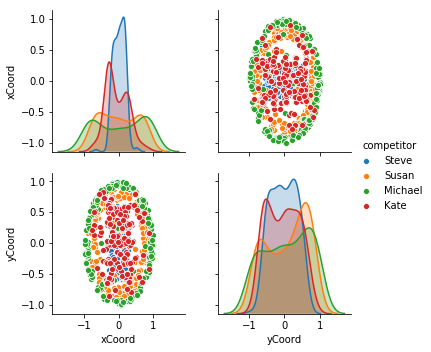

Dataset stats: 
            xCoord      yCoord
count  800.000000  800.000000
mean     0.005943    0.022868
std      0.475971    0.514482
min     -0.991140   -0.993547
25%     -0.295314   -0.423078
50%      0.000619    0.034483
75%      0.273953    0.452204
max      0.984816    0.994344
Observations per class: 
 Michael    200
Steve      200
Kate       200
Susan      200
Name: competitor, dtype: int64


In [4]:
# Use pairplot and set the hue to be our class
sns.pairplot(darts, hue='competitor') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', darts.describe())

# Count the number of observations of each class
print('Observations per class: \n', darts['competitor'].value_counts())

In [7]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

darts.competitor

0      2
1      3
2      1
3      0
4      2
5      0
6      0
7      2
8      3
9      0
10     0
11     2
12     0
13     0
14     1
15     1
16     0
17     3
18     2
19     0
20     1
21     2
22     2
23     1
24     3
25     2
26     2
27     0
28     1
29     1
      ..
770    1
771    1
772    1
773    1
774    1
775    3
776    3
777    3
778    1
779    1
780    0
781    1
782    3
783    3
784    0
785    3
786    3
787    1
788    1
789    2
790    1
791    1
792    2
793    1
794    2
795    0
796    2
797    1
798    1
799    3
Name: competitor, Length: 800, dtype: int8

In [12]:
# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Import to_categorical from keras utils module
from keras.utils import to_categorical

# Use to_categorical on your labels for one-hot encoding
coordinates = darts.drop(['competitor'], axis=1)
competitors = to_categorical(darts.competitor)

# Now print the to_categorical() result
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [26]:
#Split data
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coordinates \
                                                    , competitors, test_size=0.33, random_state=42)

### Build Model

In [27]:
# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [51]:
#Include Keras Callbacks

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_acc', patience=50)


# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_multiclass_model.hdf5', save_best_only=True)

### Fit Model

In [52]:
# Train your model on the training data for 200 epochs
history = model.fit(coord_train,competitors_train, \
                    validation_data = (coord_test,competitors_test), \
                    epochs=200, \
                   callbacks=[monitor_val_acc,modelCheckpoint])


Train on 536 samples, validate on 264 samples
Epoch 1/200
536/536 [==============================] - 0s 69us/step - loss: 0.4638 - acc: 0.8228 - val_loss: 0.6954 - val_acc: 0.7955
Epoch 2/200
536/536 [==============================] - 0s 79us/step - loss: 0.4645 - acc: 0.8134 - val_loss: 0.7096 - val_acc: 0.7841
Epoch 3/200
536/536 [==============================] - 0s 78us/step - loss: 0.4694 - acc: 0.8153 - val_loss: 0.6927 - val_acc: 0.7841
Epoch 4/200
536/536 [==============================] - 0s 96us/step - loss: 0.4572 - acc: 0.8153 - val_loss: 0.6801 - val_acc: 0.7841
Epoch 5/200
536/536 [==============================] - 0s 116us/step - loss: 0.4627 - acc: 0.8228 - val_loss: 0.7057 - val_acc: 0.7803
Epoch 6/200
536/536 [==============================] - 0s 108us/step - loss: 0.4659 - acc: 0.8209 - val_loss: 0.7242 - val_acc: 0.7917
Epoch 7/200
536/536 [==============================] - 0s 126us/step - loss: 0.4665 - acc: 0.8172 - val_loss: 0.7161 - val_acc: 0.7879
Epoch 8/200
5

In [53]:
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

264/264 [==============================] - 0s 34us/step
Accuracy: 0.7840909090909091


### Review Training and Validation Loss and Accuracy

In [54]:
#Function for plotting loss over epochs
#Pulled from DataCamp class: print(inspect.getsource(plot_loss))

def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()

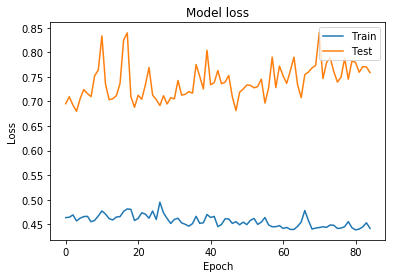

In [55]:
# Plot train vs test loss during training
plot_loss(history.history['loss'], history.history['val_loss'])

In [56]:
#Function for plotting accuracy over epochs
#Pulled from DataCamp class: print(inspect.getsource(plot_accuracy))

def plot_accuracy(acc,val_acc):
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

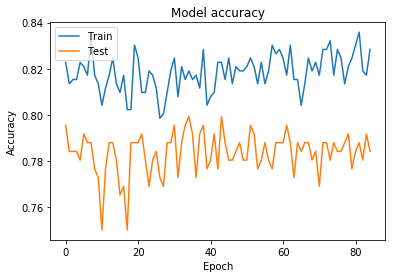

In [57]:
# Plot train vs test accuracy during training
plot_accuracy(history.history['acc'], history.history['val_acc'])

### Review Softmax Predictions

In [34]:
coords_small_test = coord_test[:10]
competitors_small_test = competitors_test[:10]

In [36]:
# Predict on X_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))


Raw Model Predictions                         | True labels
[0.23276415 0.02529992 0.7360406  0.00589539] | [0. 0. 1. 0.]
[4.73946799e-04 9.97529805e-01 1.98105979e-03 1.52251905e-05] | [0. 1. 0. 0.]
[0.69552994 0.03569341 0.26000744 0.0087692 ] | [1. 0. 0. 0.]
[0.13411908 0.02299136 0.8322925  0.01059708] | [1. 0. 0. 0.]
[0.20108493 0.01530495 0.7791314  0.00447877] | [0. 0. 0. 1.]
[3.8980342e-02 1.5380259e-01 5.6903297e-04 8.0664802e-01] | [0. 0. 0. 1.]
[3.5846327e-04 9.9878865e-01 8.4396446e-04 8.9231244e-06] | [0. 1. 0. 0.]
[1.3520326e-05 9.9992347e-01 6.2872095e-05 2.2442568e-07] | [0. 1. 0. 0.]
[0.05641593 0.04025928 0.00717799 0.89614683] | [0. 0. 0. 1.]
[2.0462714e-05 9.9991453e-01 3.3485813e-07 6.4599233e-05] | [0. 1. 0. 0.]


In [37]:
#Use np.argmax()

# Extract the indexes of the highest probable predictions
preds = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        1 | [0. 1. 0. 0.]
                        0 | [1. 0. 0. 0.]
                        2 | [1. 0. 0. 0.]
                        2 | [0. 0. 0. 1.]
                        3 | [0. 0. 0. 1.]
                        1 | [0. 1. 0. 0.]
                        1 | [0. 1. 0. 0.]
                        3 | [0. 0. 0. 1.]
                        1 | [0. 1. 0. 0.]


### Evaluate Different Activation Functions

In [65]:
#Function to create architecture

def get_model(act_function):
  model = Sequential()

  #Add in the hidden layer with activation
  if act_function == 'leaky_relu':
    model.add(Dense(128, input_shape=(2,)))
    model.add(LeakyReLU())
    model.add(Dense(64))
    model.add(LeakyReLU())
    model.add(Dense(32))
    model.add(LeakyReLU())
  else:
    model.add(Dense(128, input_shape=(2,), activation=act_function))
    model.add(Dense(64, activation=act_function))
    model.add(Dense(32, activation=act_function))
 
  #Output layer
  model.add(Dense(4, activation='softmax'))
    
  #Compile  
  model.compile(optimizer='adam', \
              loss='categorical_crossentropy',\
              metrics=['accuracy'])
  return model

In [66]:
#Run model with different activations

# Set a seed
np.random.seed(27)

# Activation functions to try
activations = ['relu', 'leaky_relu', 'sigmoid', 'tanh']

# Loop over the activation functions
activation_results = {}

for act in activations:
  # Get a new model with the current activation
  model = get_model(act)
  # Fit the model
  history = model.fit(coord_train,competitors_train,validation_data=(coord_test,competitors_test),epochs=20,verbose=0)
  activation_results[act] = history

In [67]:
#Store val_loss and val_acc in dictionaries

#Create dictionaries for val_loss and val_acc
val_loss_per_function = {}
val_acc_per_function  = {}

#Store results for val_loss and val_act in dictionaries
for act in activations:
    val_loss_per_function[act] = activation_results[act].history['val_loss']
    val_acc_per_function[act]  = activation_results[act].history['val_acc']
    
#Review results
val_loss_per_function

{'leaky_relu': [1.3646882808569707,
  1.3326012654737993,
  1.2852112199320938,
  1.2211065978714915,
  1.1354821920394897,
  1.0570386106317693,
  0.9856665730476379,
  0.9564522251938329,
  0.9220726616454847,
  0.8814481063322588,
  0.8636880896308206,
  0.8453946980563077,
  0.8289020639477354,
  0.8123259797240748,
  0.8258550130959713,
  0.8013324249874462,
  0.8058604327115145,
  0.8012652686147979,
  0.7647377704129075,
  0.7780907659819631],
 'relu': [1.3632366007024592,
  1.315311554706458,
  1.2631987875158137,
  1.214166345018329,
  1.1690757202379631,
  1.1064846443407463,
  1.0400236014163855,
  0.9742875641042535,
  0.9255504716526378,
  0.8906646316701715,
  0.872687943053968,
  0.8512564753041123,
  0.8407095779072155,
  0.8357941436045098,
  0.814202525398948,
  0.7984425786769751,
  0.7969901056000681,
  0.7844588612065171,
  0.7837687766913212,
  0.7759699640852032],
 'sigmoid': [1.4143477100314517,
  1.4049773866480046,
  1.398527726982579,
  1.4041023832378965,
  

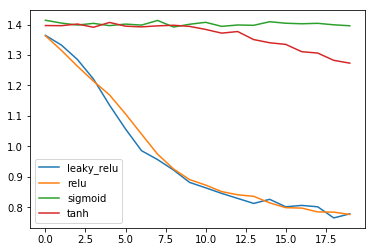

In [68]:
#Evaluate val_loss

# Create a dataframe from val_loss_per_function
val_loss= pd.DataFrame(val_loss_per_function)

# Call plot on the dataframe
val_loss.plot()
plt.show()


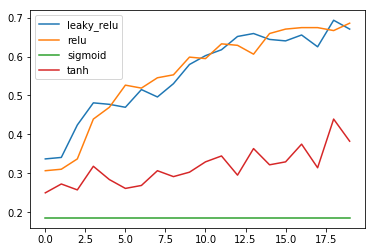

In [69]:
#Evaluate val_acc

# Create a dataframe from val_acc_per_function
val_acc = pd.DataFrame(val_acc_per_function)

# Call plot on the dataframe
val_acc.plot()
plt.show()